# Project1: Data Story on the History of Philosophy
### Prepared by: Woonsup Kim (wk2371)

In [1]:
import os
os.chdir('C:/Users/Woon/Desktop/Columbia/Applied Analytics/Term3/AppliedDataScience/fall2022-project1-woonsupkim')

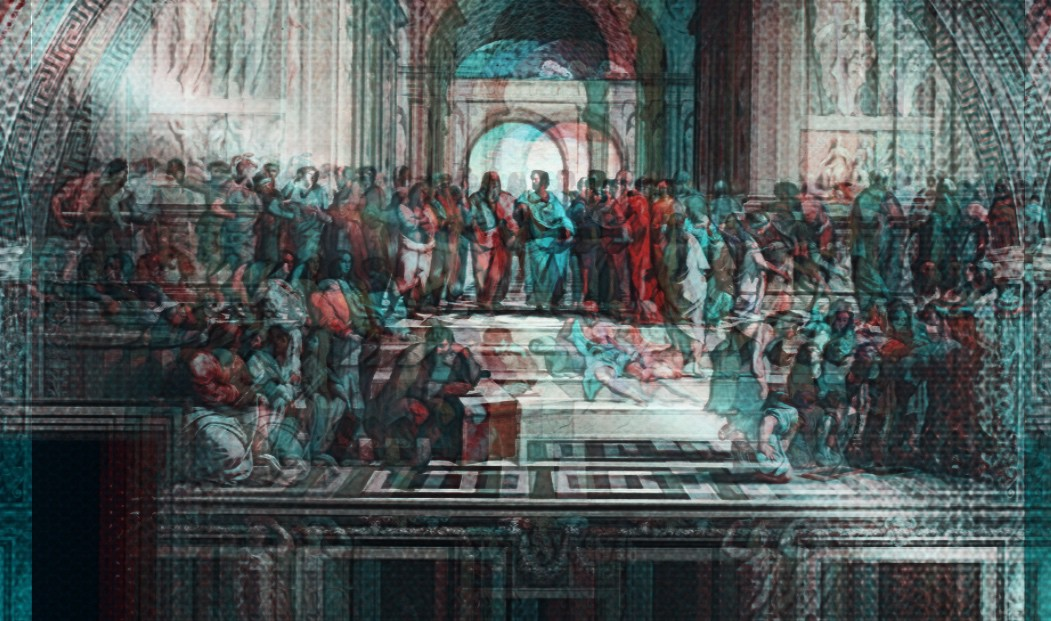

In [2]:
from IPython.display import Image
Image(filename='figs/phil.jpeg')

In [3]:
import sys
sys.path.insert(1, 'C:/Users/Woon/Desktop/Columbia/Applied Analytics/Term3/AppliedDataScience/fall2022-project1-woonsupkim/lib')

import helper_functions

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from helper_functions import *

import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

pd.set_option('display.max_columns', None) 

In [5]:
df = pd.read_csv('data/philosophy_data.csv')

In [6]:
i = []

for string in df['sentence_lowered']:
    i.append(count_words(string))

df['word_count'] = i

In [7]:
df.isnull().sum();

In [8]:
df.loc[df['sentence_lowered'].duplicated(keep=False), :];
df2 = df.drop_duplicates('sentence_lowered');

In [9]:
# from transformers import pipeline
# sentiment_pipeline = pipeline("sentiment-analysis")

# sentiment = []
# index = -1
# for sentence in df2['sentence_lowered']:
#     index+=1
#     if(index%10000 == 0):
#         print(index)

#     result = sentiment_pipeline(sentence[:512])[0]
#     sentiment.append(result['score'])
#df2['sentiment_score'] = sentiment

In [10]:
# sentiment = []

# for score in df2['sentiment_score']:
#     if score >= 0.7:
#         sentiment.append('Good')
#     elif score <= 0.3:
#         sentiment.append('Bad')
#     else:
#         sentiment.append('Neutral')
        
# df2['sentiment'] = sentiment

In [11]:
#df2.to_csv('output\sentiment_data.csv')
df2 = pd.read_csv('output\sentiment_data.csv')

In [12]:
len(df2['author'].unique());
df2['author'].value_counts();

In [13]:
len(df2['school'].unique());
df2['school'].value_counts();

## Introducing the Philosophers

There have been a great many philosophers throuhgout history who have tried to understand the world through logic and observations. <br>
Here are some of the notable ones throughout history and the number of publications they have made in shaping our world-view today.

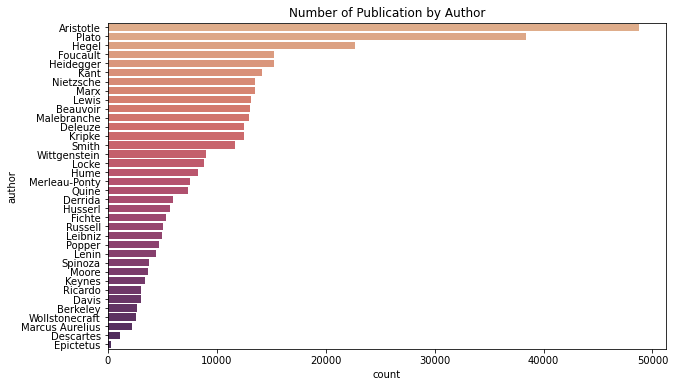

In [14]:
from platform import platform


fig,ax = plt.subplots()
fig.set_size_inches(10,6)
plt.title('Number of Publication by Author')
sns.countplot(y = 'author', data = df2, order = df2['author'].value_counts().index, palette = 'flare');

#save the figure
plt.savefig('figs/Number_of_publication_by_author.jpg');

**Aristotle** and **Plato** stand out as the giants of ancient philosophers who have made over 30000 publications. <br>
**Hegel** is the only modern philosopher who have made over 20000 publications.
<br>
<br>

## Common Topics in Philosophy

There are common topics that the philosophers contemplated about. 

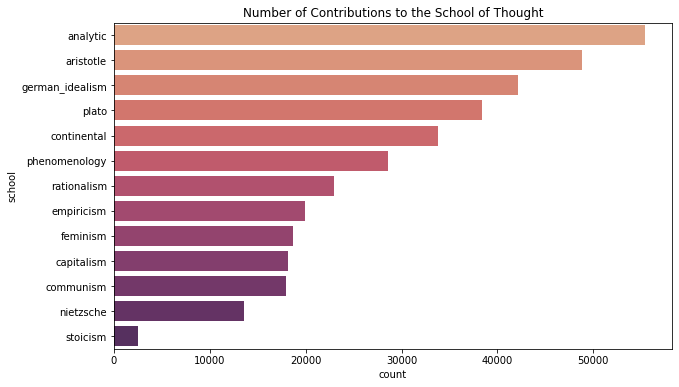

In [15]:
fig,ax = plt.subplots()
fig.set_size_inches(10,6)
plt.title('Number of Contributions to the School of Thought');
sns.countplot(y = 'school', data = df2, order = df2['school'].value_counts().index, palette = 'flare');

#save the figure
plt.savefig('figs/Number_of_contributions_to_the_School_of_thought.jpg');

<br>
Among the different topics, **analytic**, **german idealism**, and **continental** were the top 3 topics with the most number of publications. <br>
<br>
Note that *Aristotle*, *Plato*, and *Nietzsche* are not topics. Each of them have made publications in many different topics and due to data quality, this level of granularity is not shown.

 Furthermore, below table shows that there are more than one authors that have made contributions to shaping our thoughts on each of the topics.

In [16]:
df_test = df2.groupby(["school"])['author'].nunique().reset_index()
df_test.sort_values(by=['author'], ascending=False)[0:10]

,school,author
0,analytic,7
11,rationalism,4
2,capitalism,3
4,continental,3
5,empiricism,3
6,feminism,3
7,german_idealism,3
9,phenomenology,3
3,communism,2
12,stoicism,2


## Philosophical Activities Over Time 

The philosophical studies have fluctuated over time. Observing the number of publications over time can reveal the level of philosophical activity at a certain time in history. <br> 
Below plot shows the number of philosophical publications over time since the year 1500. <br>
This analysis was conducted only on publications after the year 1500 since it is not difficult to recognize the challenge of preserving published articles from ancient times.

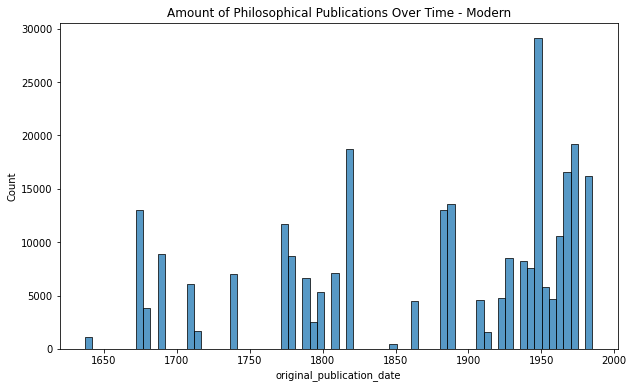

In [17]:
df3 = df2[df2['original_publication_date'] >= 1500]
fig,ax = plt.subplots()
fig.set_size_inches(10,6)
plt.title('Amount of Philosophical Publications Over Time - Modern')
sns.histplot(x='original_publication_date', data = df3);
#save the figure
plt.savefig('figs/Amount_of_Philosophical_Publications_Over_Time_Modern.jpg');

<br>
A quick glance at the plot shows that philosophical activities grew in the 1900s.
<br>
<br>

# Analysis on the Authors

In [18]:
df_wordcount = df2.groupby(['author'])['word_count'].mean().reset_index()
df_sentenelength = df2.groupby(['author'])['sentence_length'].mean().reset_index()

## Writing Habits of the Authors

Some philosophers tend to be verbose and others tend to be concise in formalizing their thoughts. <br>
<br>
Below are top 5 philosophers with the longest average number of words in their publications. 

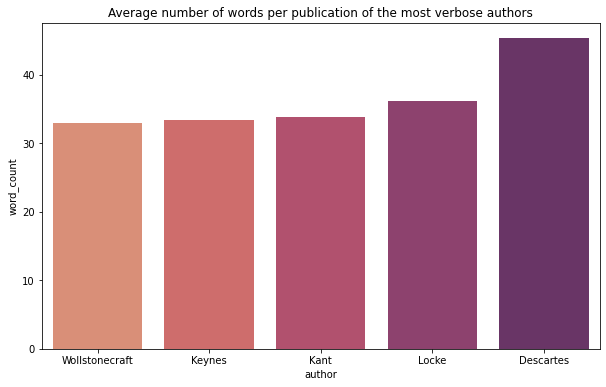

In [19]:
fig,ax = plt.subplots()
fig.set_size_inches(10,6)
plt.title('Average number of words per publication of the most verbose authors');
sns.barplot(x = df_wordcount.sort_values(by=['word_count'])[31:36]['author'], y = df_wordcount.sort_values(by=['word_count'])[31:36]['word_count'], palette = 'flare');
#save the figure
plt.savefig('figs/Average number of words per publication of the most verbose authors.jpg');

<br>
Similarly, below are the top 5 philosophers with the shortest average number of words in their publications.

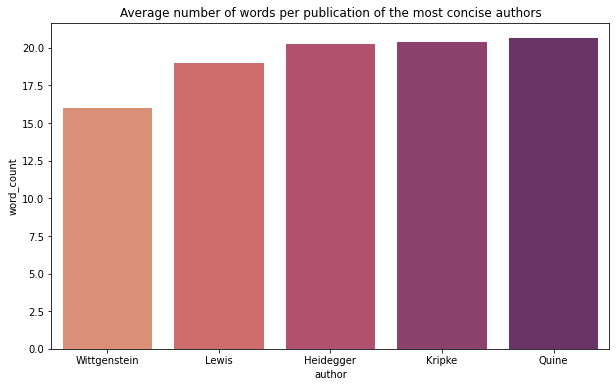

In [20]:
fig,ax = plt.subplots()
fig.set_size_inches(10,6)
plt.title('Average number of words per publication of the most concise authors');
sns.barplot(x = df_wordcount.sort_values(by=['word_count'])[0:5]['author'], y = df_wordcount.sort_values(by=['word_count'])[0:5]['word_count'], palette = 'flare');
#save the figure
plt.savefig('figs/Average number of words per publication of the most concise authors.jpg');

## Frequent Words used by the Authors

In [21]:
from collections import defaultdict
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)

In [22]:
df_plato = df2[df2['author'] == 'Plato']
df_aristotle = df2[df2['author'] == 'Aristotle']
df_hegel = df2[df2['author'] == 'Hegel']
df_foucault = df2[df2['author'] == 'Foucault']
df_heidegger = df2[df2['author'] == 'Heidegger']

Typically, a person tends to use the same phrases in their speech and writing. <br> 
Below shows the common 2-word phrases that each of the top 5 most published philosophers used.

In [23]:
## Get the bar chart for Plato ##
freq_dict = defaultdict(int)
for sent in df_plato["sentence_lowered"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
fd_sorted = fd_sorted.drop(labels=0, axis=0)
trace0 = horizontal_bar_chart(fd_sorted.head(10), 'maroon')

## Get the bar chart for Aristotle ##
freq_dict = defaultdict(int)
for sent in df_aristotle["sentence_lowered"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
fd_sorted = fd_sorted.drop(labels=0, axis=0)
trace1 = horizontal_bar_chart(fd_sorted.head(10), 'maroon')

## Get the bar chart for Hegel ##
freq_dict = defaultdict(int)
for sent in df_hegel["sentence_lowered"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
fd_sorted = fd_sorted.drop(labels=0, axis=0)
trace2 = horizontal_bar_chart(fd_sorted.head(10), 'maroon')

## Get the bar chart for Foucault ##
freq_dict = defaultdict(int)
for sent in df_foucault["sentence_lowered"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
fd_sorted = fd_sorted.drop(labels=0, axis=0)
trace3 = horizontal_bar_chart(fd_sorted.head(10), 'maroon')

## Get the bar chart for Heidegger ##
freq_dict = defaultdict(int)
for sent in df_heidegger["sentence_lowered"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
fd_sorted = fd_sorted.drop(labels=0, axis=0)
trace4 = horizontal_bar_chart(fd_sorted.head(10), 'maroon')


# Creating two subplots
fig = tools.make_subplots(rows=1, cols=5, horizontal_spacing=0.15,
                          subplot_titles=["Plato",
                                          "Aristotle",
                                          "Hegel",
                                          "Foucault",
                                          "Heidegger"]);
fig.append_trace(trace0, 1, 1);
fig.append_trace(trace1, 1, 2);
fig.append_trace(trace2, 1, 3);
fig.append_trace(trace3, 1, 4);
fig.append_trace(trace4, 1, 5);
fig['layout'].update(height=1200, width=1200, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots");
py.iplot(fig, filename='word-plots');
#save the figure
plt.savefig('figs/word-plots.jpg');

c:\Users\Woon\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



<Figure size 432x288 with 0 Axes>

<br>

It is intriguing to see that the phrase **one another** is common among all of the 5 authors suggesting that community is a natural part of the nature of knowledge, reality, and existence. <br>
<br>
Another interesting observation is that Plato and Aristotle have the exact same top 3 phrases suggesting that they had a very similar way of communicating their thoughts. This may be due to both of them being active in ancient Greece in a similar time period. 

## Analysis of Topics

In [24]:
df_analytic = df2[df2['school'] == 'analytic']
df_german_idealism = df2[df2['school'] == 'german_idealism']
df_continental = df2[df2['school'] == 'continental']
df_phenomenology = df2[df2['school'] == 'phenomenology']
df_rationalism = df2[df2['school'] == 'rationalism']
df_empiricism = df2[df2['school'] == 'empiricism']
df_feminism = df2[df2['school'] == 'feminism']
df_capitalism = df2[df2['school'] == 'capitalism']
df_communism = df2[df2['school'] == 'communism']
df_nietzsche = df2[df2['school'] == 'nietzsche']
df_aristotle = df2[df2['school'] == 'aristotle']
df_plato = df2[df2['school'] == 'plato']
df_stoicism = df2[df2['school'] == 'stoicism']


### Sentiment Change in Topics

The general sentiment on a topic is expected to change as the world around us changes. <br> 
Visualizing the change in sentiment over time can reveal how the philosophers' view on the topics have changed over time. 

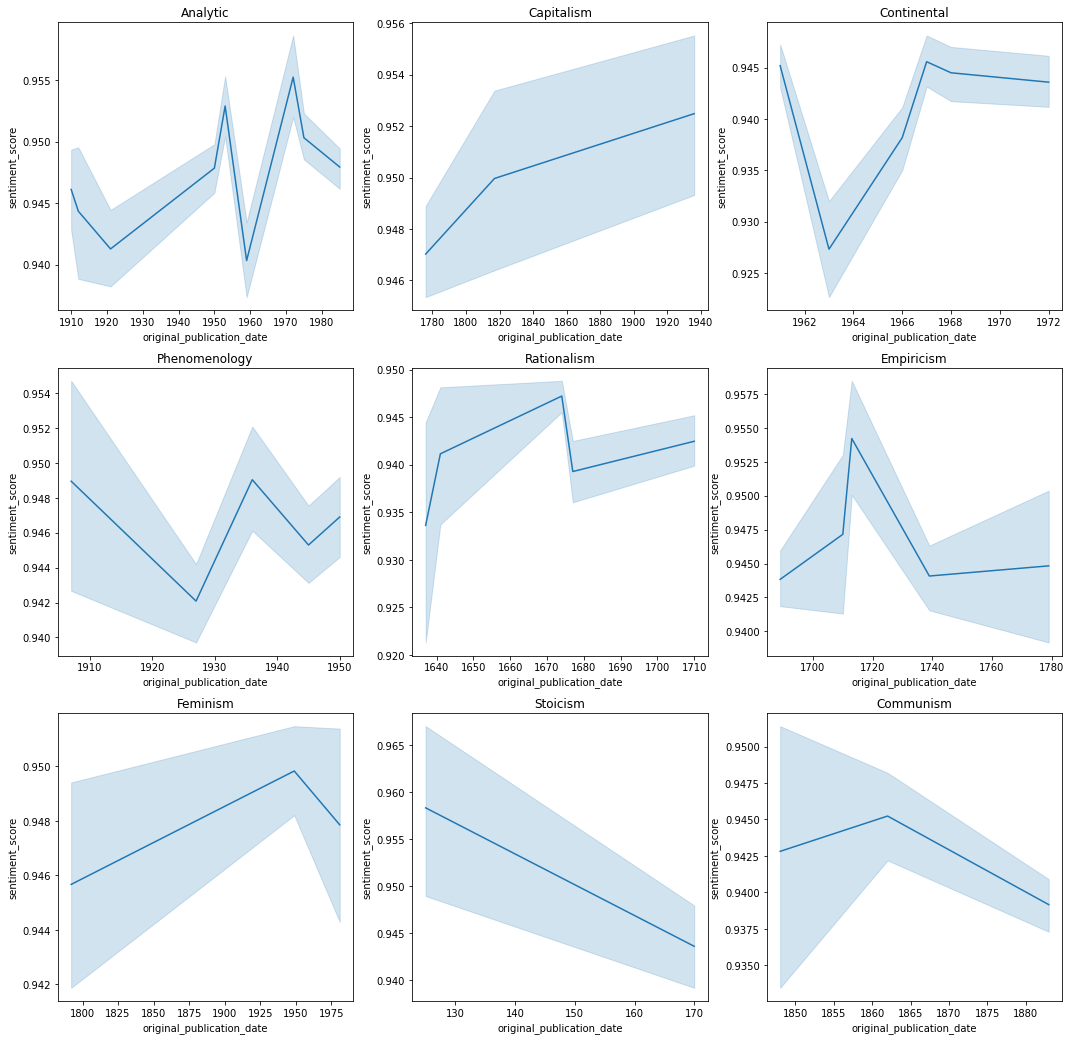

In [25]:
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

axes[0,0].set_title('Analytic');
axes[0,1].set_title('Capitalism');
axes[0,2].set_title('Continental');
axes[1,0].set_title('Phenomenology');
axes[1,1].set_title('Rationalism');
axes[1,2].set_title('Empiricism');
axes[2,0].set_title('Feminism');
axes[2,1].set_title('Stoicism');
axes[2,2].set_title('Communism');


sns.lineplot(ax = axes[0,0], x='original_publication_date', y= 'sentiment_score', data = df_analytic);
sns.lineplot(ax = axes[0,1], x='original_publication_date', y= 'sentiment_score', data = df_capitalism);
sns.lineplot(ax = axes[0,2], x='original_publication_date', y= 'sentiment_score', data = df_continental);
sns.lineplot(ax = axes[1,0], x='original_publication_date', y= 'sentiment_score', data = df_phenomenology);
sns.lineplot(ax = axes[1,1], x='original_publication_date', y= 'sentiment_score', data = df_rationalism);
sns.lineplot(ax = axes[1,2], x='original_publication_date', y= 'sentiment_score', data = df_empiricism);
sns.lineplot(ax = axes[2,0], x='original_publication_date', y= 'sentiment_score', data = df_feminism);
sns.lineplot(ax = axes[2,1], x='original_publication_date', y= 'sentiment_score', data = df_stoicism);
sns.lineplot(ax = axes[2,2], x='original_publication_date', y= 'sentiment_score', data = df_communism);

#save the figure
plt.savefig('figs/sentiment-plots.jpg');

<br>
While there are some sentiments that trends downwards, the scores are generally positive and well over 0.9. <br>
This suggests that the publications on these topics were mainly hopeful rather than critical.

Some notable topics with interesting downward trend in the sentiment scores are stoicism and communism. <br>
It is not difficult to see why this is the case due to the burdensome nature of stoicism and due to some notable historical unsuccessful practice of communism. <br>
<br>
On the other hand, some notable topics with interesting upward trend in sentiment are rationalism and feminism. <br> 
<br>

### Authors' Contributions to the Topics

As stated before, many different authors have contributed to shaping the thoughts of the important philosophical topics. <br>
The plots below show the number of publications each of the authors have made for each of the topics.

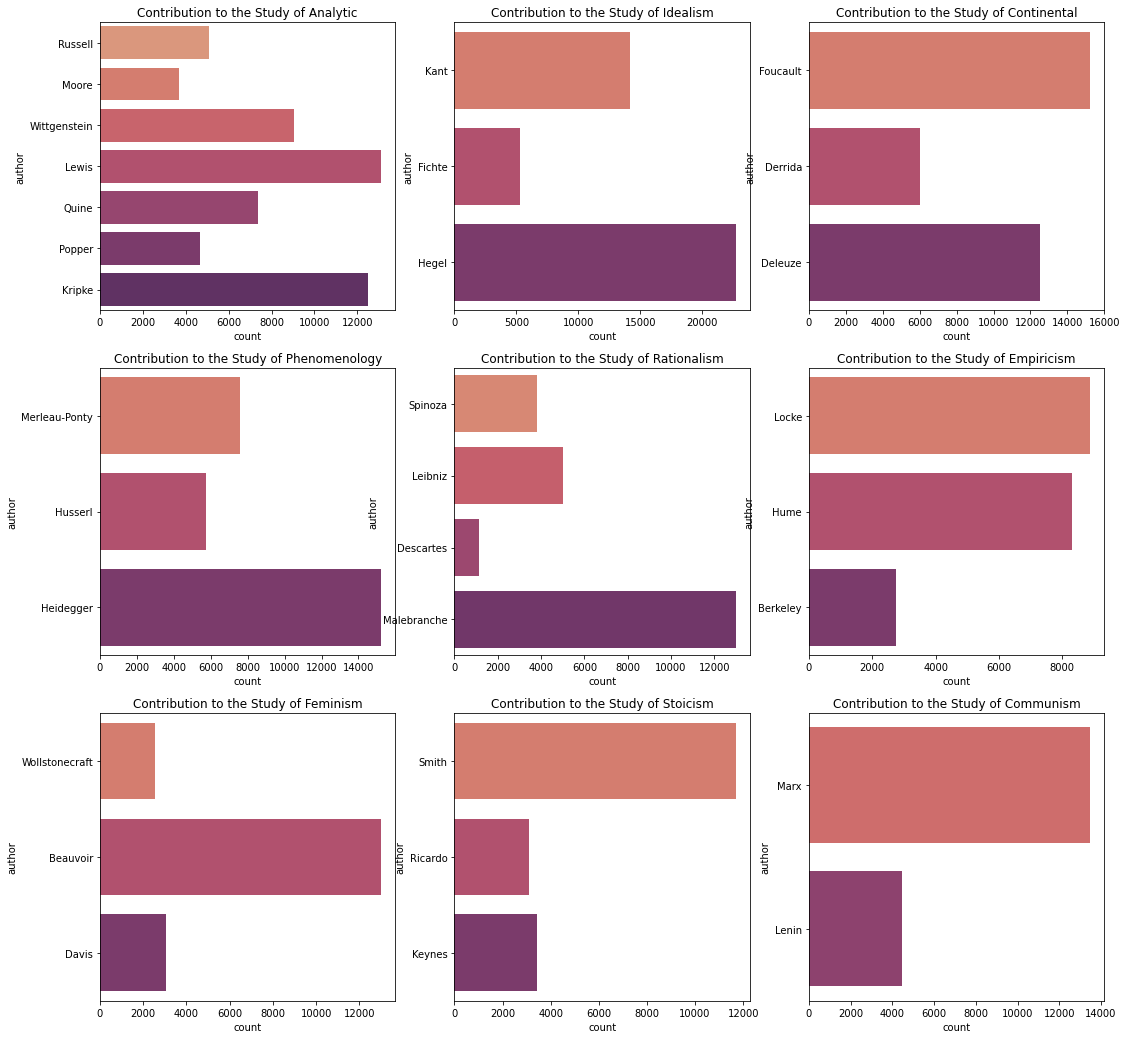

In [26]:
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

axes[0,0].set_title('Contribution to the Study of Analytic');
axes[0,1].set_title('Contribution to the Study of Idealism');
axes[0,2].set_title('Contribution to the Study of Continental');
axes[1,0].set_title('Contribution to the Study of Phenomenology');
axes[1,1].set_title('Contribution to the Study of Rationalism');
axes[1,2].set_title('Contribution to the Study of Empiricism');
axes[2,0].set_title('Contribution to the Study of Feminism');
axes[2,1].set_title('Contribution to the Study of Stoicism');
axes[2,2].set_title('Contribution to the Study of Communism');

sns.countplot(ax = axes[0,0], y = 'author', data = df_analytic, palette = 'flare');
sns.countplot(ax = axes[0,1], y = 'author', data = df_german_idealism, palette = 'flare');
sns.countplot(ax = axes[0,2], y = 'author', data = df_continental, palette = 'flare');
sns.countplot(ax = axes[1,0], y = 'author', data = df_phenomenology, palette = 'flare');
sns.countplot(ax = axes[1,1], y = 'author', data = df_rationalism, palette = 'flare');
sns.countplot(ax = axes[1,2], y = 'author', data = df_empiricism, palette = 'flare');
sns.countplot(ax = axes[2,0], y = 'author', data = df_feminism, palette = 'flare');
sns.countplot(ax = axes[2,1], y = 'author', data = df_capitalism, palette = 'flare');
sns.countplot(ax = axes[2,2], y = 'author', data = df_communism, palette = 'flare');

#save the figure
plt.savefig('figs/topic-plots.jpg');


<br>
It is interesting to see that not one author has contributed to more than one topic.

### Changes in Topic Poularity Over Time

In [27]:
df_modern = df2[df2['original_publication_date'] >= 1000]
df_time = df_modern.groupby(["school",'original_publication_date'])['author'].count().reset_index()

df_time_1900 = df_time[df_time['original_publication_date'] >= 1900]
df_time_1900 = pd.concat([df_time[df_time['school'] == 'feminism'], df_time_1900])
df_time_1900 = df_time_1900[df_time_1900['school'] != 'capitalism']
df_time_1900 = df_time_1900.drop_duplicates()

df_time_1850 = df_time[df_time['original_publication_date'] <= 1850]
df_time_1850 = df_time_1850[df_time_1850['school'] != 'capitalism']
df_time_1850 = df_time_1850[df_time_1850['school'] != 'communism']
df_time_1850 = df_time_1850[df_time_1850['school'] != 'feminism']

df_time_2 = pd.concat([df_time[df_time['school'] == 'communism'], df_time[df_time['school'] == 'capitalism']])

In [28]:
# fig,ax = plt.subplots()
# fig.set_size_inches(10,6)
# sns.lineplot(x='original_publication_date', y= 'author', hue = 'school', data = df_time);

Some topics are profound and not bound by time. These topics remain a study of interest throughout time while some topics are situational and short lived. <br>
<br>
The time-series below illustrates the change in the number of publications for various topics throughout time.

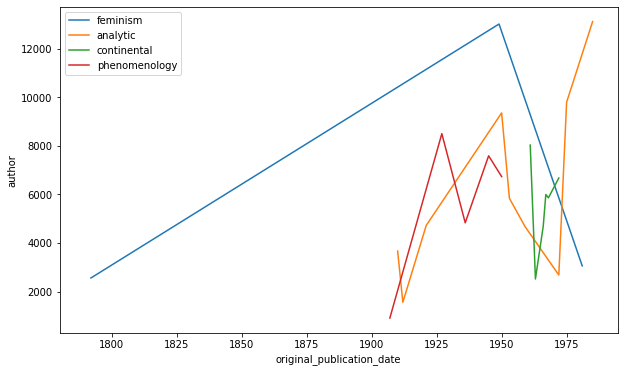

In [29]:
fig,ax = plt.subplots()
fig.set_size_inches(10,6)
sns.lineplot(x='original_publication_date', y= 'author', hue = 'school', data = df_time_1900);
ax.set_xlim(1780, );
plt.legend(loc='upper left');

#save the figure
plt.savefig('figs/timeseries1.jpg');

<br>

Aligning these plots with important historical events may bring insights as to why certain topics were popular at certain times in history. <br> 
<br>
For example, **Feminism** first surfaced around the early 1800s and peaked in the mid 1900s. This aligns with the women’s suffrage movement and the peak lines up well with when the Congress granted women the right to vote on year 1920. 

<br>

Other interesting observations that can be made from a time series is the contrasting relationship of **capitalism** and **communism**.

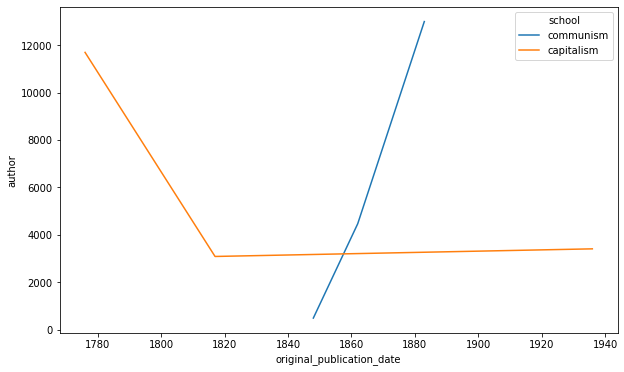

In [30]:
fig,ax = plt.subplots()
fig.set_size_inches(10,6)
sns.lineplot(x='original_publication_date', y= 'author', hue = 'school', data = df_time_2);

#save the figure
plt.savefig('figs/timeseries2.jpg');

<br>

It is not hard to see that the study of **communism** was popular during the time when **capitalism** was not.

<br>
Yet another interesting observation that can be made from a time series is the transfer of thought throughout time.

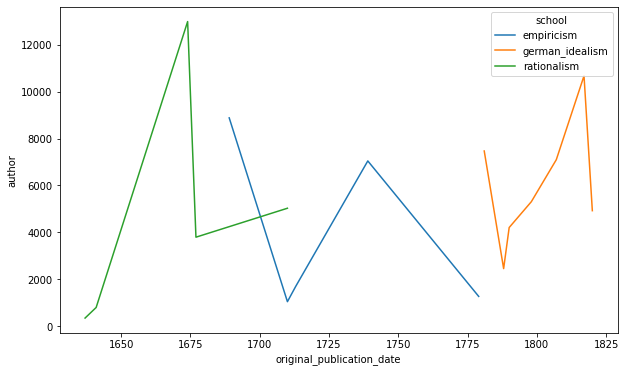

In [31]:
fig,ax = plt.subplots()
fig.set_size_inches(10,6)
sns.lineplot(x='original_publication_date', y= 'author', hue = 'school', data = df_time_1850);

#save the figure
plt.savefig('figs/timeseries3.jpg');

<br>

This is an interesting plot as it shows the change in the method of how people understood the world. <br>
<br>
In the 1600s, **rationalism** was dominant and people understood the world through reasoning and logic rather than some supernatural experience. <br> 
In the 1700s, people accepted that not everything that is logical is in fact true. This is when **empiricism** gained popularity which states that all knowledge should be verified through experiments. <br>
Then in the 1800s, people came to an acceptance that not everything might be experimentable and developed a more metaphysical perspective of **German Idealism** which associates reality to ideas in the mind rather than to material objects.

In [32]:
# classify how people think about the world
# how the topics of discussions have changed over time
# what certain authors' were concerned about the most
# how the sentiment of a certain topic changed over time
# how the sentiment of a certain topic changed over time - hue authors
# the author's sentence type (length, their frequently used vocab)
# what where the most firmly held beliefs.
#Clustering
#google how to hide jupyter notebook code
